# HR Diagram

This assignment is about stars...

We will work with a star catalogue of 240 stars described by the following information:

 - Temperature (in Kelvin)
 - Luminosity (L/Lo)
 - Radius (R/Ro)
 - Absolute magnitude (Mv)

We also have the following data for each star:
- Color (Red/Orange/Yellow/White/Blue)
- Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O')
- Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence/Supergiant/Hypergiant)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
sys.path.append(r'C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroStatistics\ML\GammaRayBursts\Utilities')
import utils
import plot_settings

Load Data

In [2]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x1deac8ae180>)

In [3]:
conv = {
    4: lambda x: 0,
    5: lambda x: 0,
    6: lambda x: 0
}

In [4]:
datapath = r'C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroStatistics\ML\HR\stars.csv'
data = np.loadtxt(datapath, skiprows=1, delimiter=',', converters=conv).T

In [5]:
temp, lumi, rads, mags = data[0], data[1], data[2], data[3]

## PCA

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
X = np.vstack([temp, lumi, rads, mags]).T

In [9]:
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=4)

In [12]:
pca.fit(X_scaled)

PCA(n_components=4)

In [13]:
vals = pca.transform(X_scaled)
mean = pca.mean_
vecs = pca.components_

In [14]:
print(vals.shape)
print(vecs.shape)

(240, 4)
(4, 4)


In [15]:
evals = pca.explained_variance_ratio_ 
print('Expained fractional variance of data encapsulated in the eigenvalues: ' + str(evals))

Expained fractional variance of data encapsulated in the eigenvalues: [0.60357391 0.23500784 0.09329645 0.0681218 ]


Text(0.5, 0, '$\\lambda$')

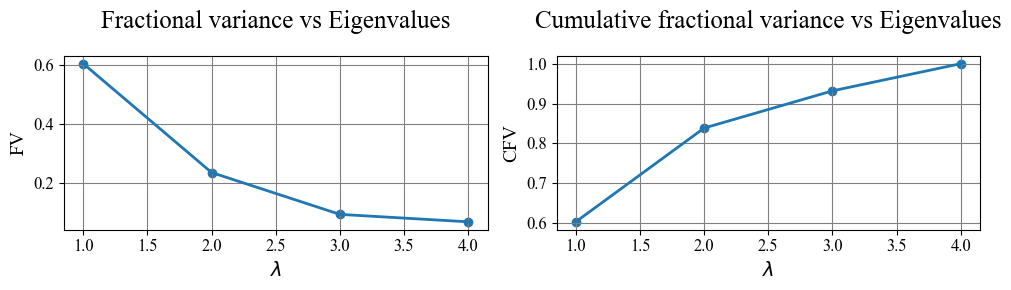

In [16]:
fig = plt.figure(figsize=(10, 3))

ax = fig.add_subplot(121)
ax.plot(np.arange(vecs.shape[0])+1, evals)
ax.scatter(np.arange(vecs.shape[0])+1, evals)
ax.set_title('Fractional variance vs Eigenvalues')
ax.set_ylabel('FV')
ax.set_xlabel(r'$\lambda$')

ax = fig.add_subplot(122)
ax.plot(np.arange(vecs.shape[0])+1, evals.cumsum())
ax.scatter(np.arange(vecs.shape[0])+1, evals.cumsum())
ax.set_title('Cumulative fractional variance vs Eigenvalues')
ax.set_ylabel('CFV')
ax.set_xlabel(r'$\lambda$')

This means that we can use just the first eigenvalue (Temperature) and still hold 60% of the overall information contained in the dataset. \
Nontheless we'll do a scatter plot of the first two components, namely Temperature and Luminosity.

In [17]:
import pandas as pd

In [18]:
df_stars = pd.read_csv(datapath)

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_

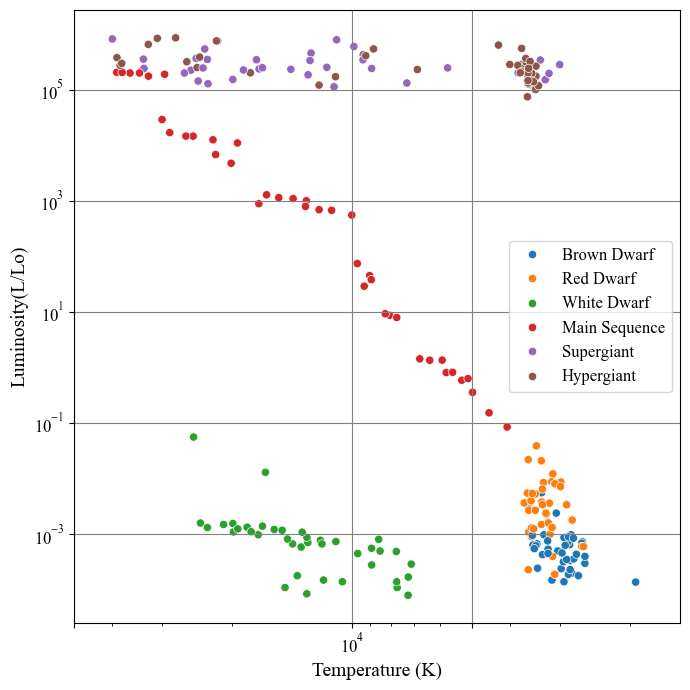

In [20]:
import seaborn as sns

fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()